# 인스타그램 로그인
<hr>
아래에 정의된 함수들을 한 번씩만 실시하고, 이 함수를 사용한 코드들을 모아둔 코드에서 크롤링을 실시하기
위의 코드들은 함수를 미리 정의하여, 크롤링 사용에 용이하도록 만든 코드들임

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

# 크롬 브라우저 열기
driver = webdriver.Chrome('C:/Temp/chromedriver')

driver.get("https://www.instagram.com/accounts/login/")
time.sleep(2)

email = '본인 ID'
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '본인 PWD' 
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

In [ ]:
# 인스타그램 해시태그 검색

def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/" + word
    return url
import time

word = "산수갑산"
url = insta_searching(word)
driver.get(url)

In [ ]:
# 총 게시물 개수

postnumber = driver.find_elements_by_css_selector("span > span.g47SY")[0].text.replace(',', '')
postnumber = int(postnumber)

In [ ]:
# 첫번째 게시물 열기

def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(2)
    
select_first(driver)

In [ ]:
# 게시물 내용 크롤링

import re
from bs4 import BeautifulSoup

def get_content(driver):
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    # 본문 내용 
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ' '
    # 해시태그 
    try:
        tags = re.findall(r'#[^\s#,\\]+', content)  
    except:
        tags = ' '
    # 작성일자 
    try:
        date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    except:
        date = ''
    # 좋아요 
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # 위치
    try: 
        place = soup.select('div.M30cS')[0].text
    except:
        place = ''
   
    data = [content, date, like, place, tags]
    time.sleep(1)
    return data
    

get_content(driver)

In [ ]:
# 다음 게시물로 이동

def move_next(driver):

    right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    right.click()

move_next(driver)

# 인스타그램 게시물 크롤링 하기    <img src='data/instagram.PNG' width=120 height=120 align="right">         
### : 본격적인 크롤링은 아래의 코드를 사용하기
<hr>
위에 코드들을 한 번 씩 실행 후, 아래의 코드에 word 내용만 변경하여 실행하면 반복 실행 

In [ ]:
import pandas as pd

df = pd.read_excel('output/음식점 모음.xlsx').fillna("missing")

for i in range(30) :
    for j in range(20) :
        if df.iloc[i, j] != "missing":
            search = df.iloc[i, j].replace(' ', '')

            url = insta_searching(search)
            driver.get(url)
            time.sleep(8)

            postnumber = driver.find_elements_by_css_selector("span > span.g47SY")[0].text.replace(',', '')
            postnumber = int(postnumber)

            select_first(driver)
            instagram = []
            data = []

            for k in range(101) :
                html = driver.page_source
                soup = BeautifulSoup(html, 'lxml')
                # 본문 내용 
                try:
                    content = soup.select('div.C4VMK > span')[0].text
                except:
                    content = ' '
                # 해시태그 
                try:
                    tags = re.findall(r'#[^\s#,\\]+', content)  
                except:
                    tags = ' '
                # 작성일자 
                try:
                    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
                except:
                    date = ''
                # 좋아요 
                try:
                    like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
                except:
                    like = 0
                # 위치
                try: 
                    place = soup.select('div.M30cS')[0].text
                except:
                    place = ''

                data = [content, date, like, place, tags]
                instagram = (instagram,data,'\n')
                time.sleep(0.5)
                move_next(driver)
                time.sleep(2)
           
            data_df = pd.DataFrame(instagram)
            data_df.columns = ['content','hashtag','date','like','place']
            data_df.to_excel('./data/instagram/'+ search +'.csv', encoding="utf-8")

# 이어지는 분석
### 파급력 분석하기
power = power3 = (기준일 후 게시물 개수 / [(가장 마지막 게시물 날짜- 기준일) / (마지막날짜 - 오래된 날짜) * 100] - 기준일 전 게시물 개수 / [(기준일 - 게시물 중 가장 오래된 날짜) / (마지막날짜 - 오래된 날짜) * 100]
reliability2 = reference_after/(reference_affter - resource_count) * 100%

### 신뢰도 분석하기
reliability1 = resource_count / reference_after * 100% 

<hr>
<br>
* resource_count값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(0 , 200))
* file : power3(사람별 - 해당 미디어의 영향력) power3값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(-?, ?)) 
* (사람별 - 영향력의 크기) reliability2값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(-?, ?)) 
* (사람별 - 글을 작성할 확률) reliability값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(-?, ?)) 
* ~~글씨체 정하기~~
* 산점도 그리기 : (resource - power3) (20 - (-? - ?))
* 히트맵 : 블로그 게시물 개수(200개 아님)
* 시계열 / 워드 클라우드(자주 사용하는 단어 찾기) 47- 하니칼국수 - 성시경 / 181-코카모메-츄릅켠 / 270-전참시-몽탄
* 분산분석(미디어별 - 해당 미디어의 영향력) power3값
* 분산분석(미디어별 - 영향력의 크기) reliability2값
* 분산분석(미디어별 - 글을 작성할 확률) reliability값



## 논점
- 2차 생산물을 알지 못함
- 모집단을 조사한 것이 아니라 일부 표본을 조사한 것
- 작성자의 해시태그와 게시글을 통해 작성자의 취향을 파악하여, 마케팅에 사용할 수 있을 것

In [ ]:
# 데이터 한 데 모으기
import os
import pandas as pd
from konlpy.tag import Okt  # kkma 사용하면, 개수가 안 맞음 

okt = Okt()     

total = pd.DataFrame()
temp = pd.DataFrame()
count_theName = pd.DataFrame()

path_dir = './data/instagram/rowdata'
file_list = os.listdir(path_dir)

# 데이터들이 들어있는 파일 열기
for l in file_list :
    tflist = pd.DataFrame()
    splited_dir = l.split('_')
    file = "./data/instagram/rowdata/" + l 
    temp_items = pd.read_csv(file, engine='python') # engine을 주지 않으면, encoding에러가 남

    for k in range(len(temp_items.index)) : 
        if splited_dir[1].replace(".csv", "") in (okt.nouns(temp_items.loc[k, "content"].replace("#","") + temp_items.loc[k, "hashtag"].replace("#",""))) :
            tf = pd.DataFrame(temp_items.loc[k]).transpose()
            tflist = tflist.append(tf, ignore_index=True)
            if tflist is not None :
                date = tflist.sort_values(by='date', ascending=True).head(1)
                theDay = str(date.iloc[0, 3])                
            else :
                theDay = "2099-12-31"
        oldestdate = temp_items.sort_values(by='date', ascending=True).head(1)
        oldestDate = str(oldestdate.iloc[0, 3])
        updateddate = temp_items.sort_values(by='date', ascending=False).head(1)
        updatedDate = str(updateddate.iloc[0, 3])

    tflist.to_csv('./data/instagram/referenceONLY/'+ splited_dir[0] + '_' + splited_dir[1], encoding="utf-8")    

    mediaName = splited_dir[1].replace(".csv", "")
    restaurant = splited_dir[0]
    data = pd.DataFrame([mediaName, restaurant, oldestDate, theDay, updatedDate]).transpose()         
    total = total.append(data, ignore_index = True)
    temp = temp.append(temp_items, ignore_index = True) 
                         
temp.to_csv('./data/instagram/sumData.csv', encoding="utf-8")
total.to_csv('./data/instagram/instagramtotal.csv', encoding="utf-8")

In [1]:
import pandas as pd
import datetime

df = pd.read_csv('./data/instagram/instagramtotal.csv')
df = df.drop([df.columns[0]], axis = 1)
df.columns = ['mediaName', 'restaurant', 'oldestDate', 'theDay', 'updatedDate']
display(df)

df.theDay = pd.to_datetime(df["theDay"])
df.oldestDate = pd.to_datetime(df["oldestDate"])
df.updatedDate = pd.to_datetime(df["updatedDate"])
df['before_theDay'] = (df.theDay - df.oldestDate).dt.days
df['after_theDay'] = (df.updatedDate - df.theDay).dt.days

display(df)

,mediaName,restaurant,oldestDate,theDay,updatedDate
0,츄릅켠,가쯔렛,2019-05-28,2020-02-08,2021-09-30
1,생방송투데이,강릉수제어묵고로케,2019-03-02,2099-12-31,2021-10-11
2,맛있는녀석들,강릉짬뽕순두부,2018-07-26,2099-12-31,2021-10-22
3,백종원,고단백식당,2017-07-28,2020-03-11,2021-10-20
4,츄릅켠,그랜드조선부산아리아,2020-10-21,2099-12-31,2021-10-21
...,...,...,...,...,...
90,성시경,평양면옥,2020-08-25,2099-12-31,2021-10-21
91,더들리,포시즌스,2019-09-18,2099-12-31,2021-10-21
92,성시경,하니칼국수,2021-04-27,2021-10-17,2021-10-22
93,이영자,홍미닭발,2018-04-27,2018-12-19,2021-10-20


,mediaName,restaurant,oldestDate,theDay,updatedDate,before_theDay,after_theDay
0,츄릅켠,가쯔렛,2019-05-28,2020-02-08,2021-09-30,256,600
1,생방송투데이,강릉수제어묵고로케,2019-03-02,2099-12-31,2021-10-11,29524,-28570
2,맛있는녀석들,강릉짬뽕순두부,2018-07-26,2099-12-31,2021-10-22,29743,-28559
3,백종원,고단백식당,2017-07-28,2020-03-11,2021-10-20,957,588
4,츄릅켠,그랜드조선부산아리아,2020-10-21,2099-12-31,2021-10-21,28925,-28560
...,...,...,...,...,...,...,...
90,성시경,평양면옥,2020-08-25,2099-12-31,2021-10-21,28982,-28560
91,더들리,포시즌스,2019-09-18,2099-12-31,2021-10-21,29324,-28560
92,성시경,하니칼국수,2021-04-27,2021-10-17,2021-10-22,173,5
93,이영자,홍미닭발,2018-04-27,2018-12-19,2021-10-20,236,1036


In [2]:
import os
path_dir = './data/instagram/referenceONLY'
file_list = os.listdir(path_dir)

countName = []
for l in file_list :    
    splited_dir = l.split('_')
    file = "./data/instagram/referenceONLY/" + l 
    try :
        temp_items = pd.read_csv(file, engine='python')
        count = len(temp_items)
        countName.append(count)
    except :
        countName.append(0)
df["countName"] = countName
display(df)

,mediaName,restaurant,oldestDate,theDay,updatedDate,before_theDay,after_theDay,countName
0,츄릅켠,가쯔렛,2019-05-28,2020-02-08,2021-09-30,256,600,1
1,생방송투데이,강릉수제어묵고로케,2019-03-02,2099-12-31,2021-10-11,29524,-28570,0
2,맛있는녀석들,강릉짬뽕순두부,2018-07-26,2099-12-31,2021-10-22,29743,-28559,0
3,백종원,고단백식당,2017-07-28,2020-03-11,2021-10-20,957,588,15
4,츄릅켠,그랜드조선부산아리아,2020-10-21,2099-12-31,2021-10-21,28925,-28560,0
...,...,...,...,...,...,...,...,...
90,성시경,평양면옥,2020-08-25,2099-12-31,2021-10-21,28982,-28560,0
91,더들리,포시즌스,2019-09-18,2099-12-31,2021-10-21,29324,-28560,0
92,성시경,하니칼국수,2021-04-27,2021-10-17,2021-10-22,173,5,1
93,이영자,홍미닭발,2018-04-27,2018-12-19,2021-10-20,236,1036,17


In [21]:
import os
import pandas as pd
from konlpy.tag import Okt  # kkma 사용하면, 개수가 안 맞음 

okt = Okt()     
reference_before = []
reference_after = []
total = pd.DataFrame()
temp = pd.DataFrame()
count_theName = pd.DataFrame()

path_dir = './data/instagram/rowdata'
file_list = os.listdir(path_dir)

# 데이터들이 들어있는 파일 열기
for l in file_list :
    tflist = pd.DataFrame()
    splited_dir = l.split('_')
    file = "./data/instagram/rowdata/" + l 
    temp_items = pd.read_csv(file, engine='python') # engine을 주지 않으면, encoding에러가 남

    for k in range(len(temp_items.index)) : 
        if splited_dir[1].replace(".csv", "") in (okt.nouns(temp_items.loc[k, "content"].replace("#","") + temp_items.loc[k, "hashtag"].replace("#",""))) :
            tf = pd.DataFrame(temp_items.loc[k]).transpose()
            tflist = tflist.append(tf, ignore_index=True)
            date = tflist.sort_values(by='date', ascending=True).head(1)
            theDay = str(date.iloc[0, 3])                
    before = len(temp_items.loc[temp_items['date'] < theDay])
    reference_before.append(before)
    after = len(temp_items.loc[temp_items['date'] >= theDay])
    reference_after.append(after)

In [24]:
df["reference_before"] = reference_before
df["reference_after"] = reference_after
display(df)

,mediaName,restaurant,oldestDate,theDay,updatedDate,before_theDay,after_theDay,countName,reference_before,reference_after
0,츄릅켠,가쯔렛,2019-05-28,2020-02-08,2021-09-30,256,600,1,27,72
1,생방송투데이,강릉수제어묵고로케,2019-03-02,2099-12-31,2021-10-11,29524,-28570,0,3,97
2,맛있는녀석들,강릉짬뽕순두부,2018-07-26,2099-12-31,2021-10-22,29743,-28559,0,1,98
3,백종원,고단백식당,2017-07-28,2020-03-11,2021-10-20,957,588,15,1,99
4,츄릅켠,그랜드조선부산아리아,2020-10-21,2099-12-31,2021-10-21,28925,-28560,0,0,98
...,...,...,...,...,...,...,...,...,...,...
90,성시경,평양면옥,2020-08-25,2099-12-31,2021-10-21,28982,-28560,0,0,100
91,더들리,포시즌스,2019-09-18,2099-12-31,2021-10-21,29324,-28560,0,2,98
92,성시경,하니칼국수,2021-04-27,2021-10-17,2021-10-22,173,5,1,141,59
93,이영자,홍미닭발,2018-04-27,2018-12-19,2021-10-20,236,1036,17,1,199


In [ ]:
# power열 추가
# (기준일 후 게시물 개수 / [(가장 마지막 게시물 날짜- 기준일) / (마지막날짜 - 오래된 날짜) * 100] - 기준일 전 게시물 개수 / [(기준일 - 게시물 중 가장 오래된 날짜) / (마지막날짜 - 오래된 날짜) * 100]
# [기준일 후 게시물 개수 / (가장 마지막 게시물 날짜- 기준일) - 기준일 전 게시물 개수 / (기준일 - 게시물 중 가장 오래된 날짜)]* 100 *(마지막날짜 - 오래된 날짜)
df["power"] = (df["reference_after"] / df.after_theDay - df["reference_before"] / df.before_theDay) * pd.to_numeric((df["updatedDate"] - df["oldestDate"]).dt.days, downcast='integer') / 100

# reliability = resource_count / reference_after * 100%  
# reliability2 = reference_after/(reference_affter - resource_count) *100%  
# reliability2열 추가
df["reliability2"] = df["reference_after"] / (df["reference_after"] - df["countName"]) * 100
# reliability열 추가
df["reliability"] = df["countName"] / df["reference_after"] * 100
display(df)


In [72]:
df = pd.read_csv("./data/instagram/instagramtotal.csv")
df = df.sort_values(by='mediaName', ascending=True)
display(df)


,mediaName,restaurant,oldestDate,theDay,updatedDate,before_theDay,after_theDay,countName,reference_before,reference_after,power,reliability2,reliability
0,6시내고향,새만금횟집,2016-09-04,2099-12-31,2021-10-21,30433,-28560,0,8,90,-0.063947,100.000000,0.000000
1,6시내고향,바로방,2017-05-15,2099-12-31,2021-10-20,30180,-28561,0,7,93,-0.056473,100.000000,0.000000
2,6시내고향,슬지네찐빵,2018-02-07,2099-12-31,2021-10-21,29912,-28560,0,9,91,-0.047146,100.000000,0.000000
3,6시내고향,메밀꽃필무렵,2021-10-16,2099-12-31,2021-10-21,28565,-28560,0,0,98,-0.000172,100.000000,0.000000
4,6시내고향,원조유박사곱창,2017-11-04,2099-12-31,2021-09-29,30007,-28582,0,98,2,-0.047536,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,츄릅켠,코카모메,2019-11-25,2099-12-31,2021-10-21,29256,-28560,0,1,199,-0.048734,100.000000,0.000000
90,츄릅켠,시그니엘부산더뷰,2021-01-09,2021-09-30,2021-10-21,264,21,1,86,12,0.700162,109.090909,8.333333
91,츄릅켠,금돼지식당,2021-05-31,2099-12-31,2021-10-21,28703,-28560,0,0,98,-0.004907,100.000000,0.000000
92,츄릅켠,그랜드조선부산아리아,2020-10-21,2099-12-31,2021-10-21,28925,-28560,0,0,98,-0.012525,100.000000,0.000000


In [79]:
# 그룹열 만들기
연예인 = ["이영자", "백종원", "성시경", "신동엽", "최자", "정지훈", "문세윤", "김준현"]
유튜버 = ["더들리", "츄릅켠"]
방송프로그램 = ["수요미식회", "생생정보통", "전참시", "생활의달인", "6시내고향", "골목식당", "생방송오늘저녁", "모닝와이드", "맛있는녀석들", "생방송투데이"]
groups = [연예인, 유튜버, 방송프로그램]
groups_names = ["연예인", "유튜버", "방송프로그램"]
for i, groups in enumerate(groups):
    for media in groups:
        df.loc[df["mediaName"] == media, "group"] = groups_names[i]
display(df)
df.to_csv("./data/instagram/instagramtotal.csv", index=False)

,mediaName,restaurant,oldestDate,theDay,updatedDate,before_theDay,after_theDay,countName,reference_before,reference_after,power,reliability2,reliability,group
0,6시내고향,새만금횟집,2016-09-04,2099-12-31,2021-10-21,30433,-28560,0,8,90,-0.063947,100.000000,0.000000,방송프로그램
1,6시내고향,바로방,2017-05-15,2099-12-31,2021-10-20,30180,-28561,0,7,93,-0.056473,100.000000,0.000000,방송프로그램
2,6시내고향,슬지네찐빵,2018-02-07,2099-12-31,2021-10-21,29912,-28560,0,9,91,-0.047146,100.000000,0.000000,방송프로그램
3,6시내고향,메밀꽃필무렵,2021-10-16,2099-12-31,2021-10-21,28565,-28560,0,0,98,-0.000172,100.000000,0.000000,방송프로그램
4,6시내고향,원조유박사곱창,2017-11-04,2099-12-31,2021-09-29,30007,-28582,0,98,2,-0.047536,100.000000,0.000000,방송프로그램
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,츄릅켠,코카모메,2019-11-25,2099-12-31,2021-10-21,29256,-28560,0,1,199,-0.048734,100.000000,0.000000,유튜버
90,츄릅켠,시그니엘부산더뷰,2021-01-09,2021-09-30,2021-10-21,264,21,1,86,12,0.700162,109.090909,8.333333,유튜버
91,츄릅켠,금돼지식당,2021-05-31,2099-12-31,2021-10-21,28703,-28560,0,0,98,-0.004907,100.000000,0.000000,유튜버
92,츄릅켠,그랜드조선부산아리아,2020-10-21,2099-12-31,2021-10-21,28925,-28560,0,0,98,-0.012525,100.000000,0.000000,유튜버


# 시각화
## 산점도 그리기 : (resource - power3) (20 - (-? - ?))

In [29]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트설정
from matplotlib import font_manager, rc
font_path = "../PYDATAexam/data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name() # rc 함수를 통해, rcParams에 사용되는 폰트의 정식명칭을 알 수 있음
print(font_name)
rc('font', family=font_name)

data = pd.read_csv("./data/instagram/instagramtotal.csv")
display(data)

Malgun Gothic


,mediaName,restaurant,oldestDate,theDay,updatedDate,before_theDay,after_theDay,countName,reference_before,reference_after,power,reliability2,reliability
0,츄릅켠,가쯔렛,2019-05-28,2020-02-08,2021-09-30,256,600,1,27,72,0.124387,101.408451,1.388889
1,생방송투데이,강릉수제어묵고로케,2019-03-02,2099-12-31,2021-10-11,29524,-28570,0,3,97,-0.033359,100.000000,0.000000
2,맛있는녀석들,강릉짬뽕순두부,2018-07-26,2099-12-31,2021-10-22,29743,-28559,0,1,98,-0.041027,100.000000,0.000000
3,백종원,고단백식당,2017-07-28,2020-03-11,2021-10-20,957,588,15,1,99,2.585131,117.857143,15.151515
4,츄릅켠,그랜드조선부산아리아,2020-10-21,2099-12-31,2021-10-21,28925,-28560,0,0,98,-0.012525,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,성시경,평양면옥,2020-08-25,2099-12-31,2021-10-21,28982,-28560,0,0,100,-0.014776,100.000000,0.000000
91,더들리,포시즌스,2019-09-18,2099-12-31,2021-10-21,29324,-28560,0,2,98,-0.026737,100.000000,0.000000
92,성시경,하니칼국수,2021-04-27,2021-10-17,2021-10-22,173,5,1,141,59,19.553249,101.724138,1.694915
93,이영자,홍미닭발,2018-04-27,2018-12-19,2021-10-20,236,1036,17,1,199,2.389422,109.340659,8.542714


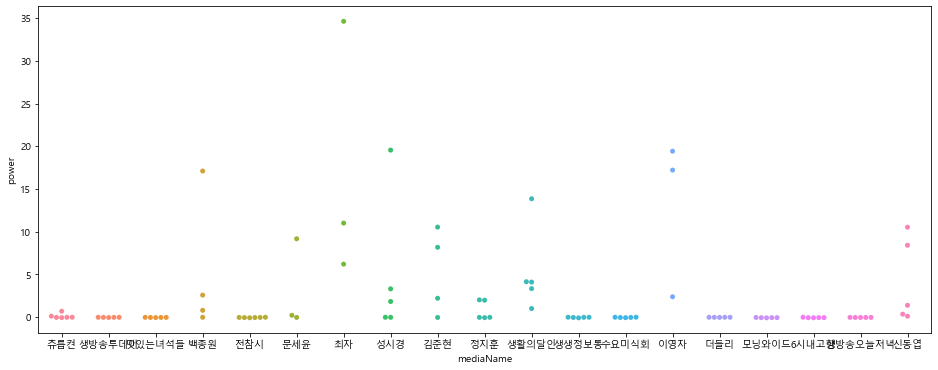

In [67]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
# sns.set_style('white')
# sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure(figsize=(16,6))

#이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 
sns.swarmplot(x="mediaName",      #x축 변수
              y="power",        #y축 변수
              data=data)   #데이터셋 - 데이터프레임

# data.plot(kind='scatter', x='resource', y='power3', marker='+',
#         cmap='viridis', s=50, alpha=0.3, figsize=(20, 5))

plt.show()


In [50]:
df1 = df.groupby("mediaName").mean("countName")
display(df1)

,before_theDay,after_theDay,countName,reference_before,reference_after,power,reliability2,reliability
mediaName,,,,,,,,
6시내고향,29819.400000,-28564.600000,0.000000,24.400000,74.800000,-0.043055,100.000000,0.000000
김준현,6411.000000,-5505.800000,3.600000,41.600000,57.600000,5.228045,105.462074,5.072222
더들리,28897.600000,-28560.000000,0.000000,2.000000,98.000000,-0.011816,100.000000,0.000000
맛있는녀석들,29327.000000,-28559.400000,0.000000,4.000000,95.800000,-0.026768,100.000000,0.000000
모닝와이드,30073.000000,-28560.000000,0.000000,32.400000,67.000000,-0.051721,100.000000,0.000000
문세윤,10289.666667,-9258.333333,4.666667,22.000000,64.666667,3.124600,107.686120,6.992853
백종원,5994.400000,-5312.800000,12.800000,14.200000,85.600000,5.122137,117.064947,13.296063
생방송오늘저녁,29315.000000,-28559.600000,0.000000,5.800000,94.200000,-0.026413,100.000000,0.000000
생방송투데이,29360.000000,-28562.000000,0.000000,1.800000,79.200000,-0.019417,100.000000,0.000000


AxesSubplot(0.125,0.125;0.775x0.755)


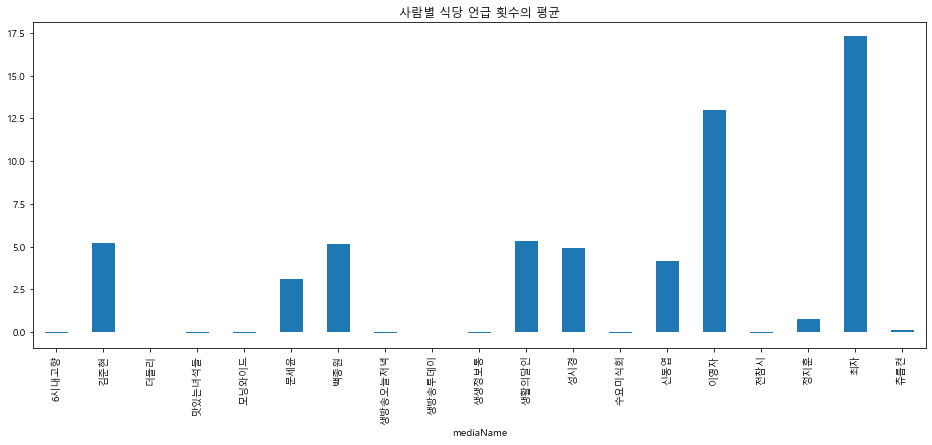

In [89]:
plt.figure(figsize=(16,6))
plt.title("사람별 식당 언급 횟수의 평균")
r = df1.power.plot(kind='bar')
print(r)

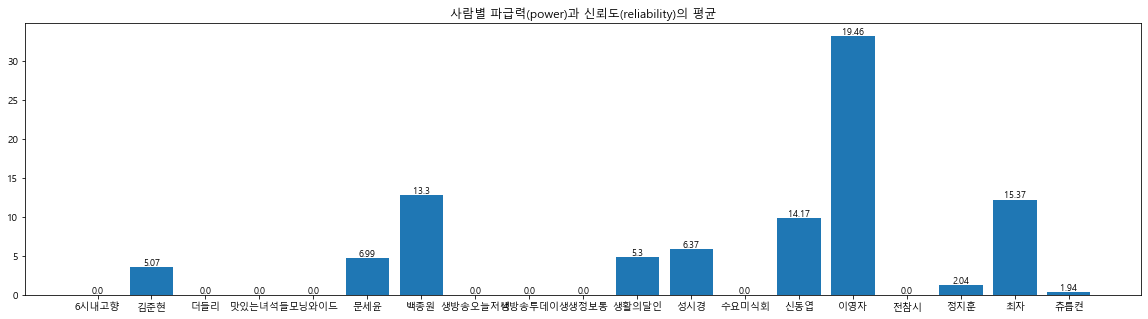

In [92]:
plt.figure(figsize=(20,5))



x = df1.index
y = df1.countName

plt.title("사람별 파급력(power)과 신뢰도(reliability)의 평균")
plt.bar(x, y)

for i, v in enumerate(x):
    plt.text(v, y[i], round(df1.reliability[i], 2),       
             fontsize = 9, 
             color='black',
             horizontalalignment='center',  
             verticalalignment='bottom')    

plt.show()

# 분산분석을 통하여 3개 이상의 집단 간에 차이가 존재하는지 분석하고자 함
### 가설1 : 미디어에 따라 파급력의 차이가 있는가?

In [99]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("df['power'] ~ df['group']", df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
df['group'],2.0,626.040178,313.020089,11.814921,0.000029
Residual,86.0,2278.451803,26.493626,NaN,NaN


In [108]:
# 집단 간의 차이가 유의할 경우, 어느 집단 간에 차이가 나타나는지 보다 구체적으로 보기 위하여 '사후 분석'을 실시
# 여기서는 봉페르니 방식의 교정과 Tukey HSD의 방법으로 사후분석
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(df['power'], df['group'])
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf') # 봉페르니
print(result[0])

#투키의 HSD - Tuckey's Honestly Significant Difference = "진정으로 유의미한 차이"
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(df['power'], df['group'], alpha=0.05)
hsd.summary()

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2  stat   pval  pval_corr reject
--------------------------------------------
방송프로그램    연예인    nan    nan       nan  False
방송프로그램    유튜버 0.7156 0.4773       1.0  False
   연예인    유튜버    nan    nan       nan  False
--------------------------------------------

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.


group1,group2,meandiff,p-adj,lower,upper,reject
방송프로그램,연예인,nan,0.5566,nan,nan,False
방송프로그램,유튜버,-0.486,0.5566,nan,nan,False
연예인,유튜버,nan,0.5566,nan,nan,False


### 가설2 : 미디어에 따라 파급력을 미치는 크기에 차이가 있는가?

In [97]:
model = ols("df['reliability'] ~ df['group']", df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
df['group'],2.0,2208.310651,1104.155326,25.611006,1.501043e-09
Residual,91.0,3923.240498,43.112533,NaN,NaN


In [107]:
# 집단 간의 차이가 유의할 경우, 어느 집단 간에 차이가 나타나는지 보다 구체적으로 보기 위하여 '사후 분석'을 실시
# 여기서는 봉페르니 방식의 교정과 Tukey HSD의 방법으로 사후분석
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(df['reliability'], df['group'])
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf') # 봉페르니
print(result[0])

#투키의 HSD - Tuckey's Honestly Significant Difference = "진정으로 유의미한 차이"
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(df['reliability'], df['group'], alpha=0.05)
hsd.summary()

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat  pval pval_corr reject
-------------------------------------------
방송프로그램    연예인 -6.6108  0.0       0.0   True
방송프로그램    유튜버     nan  nan       nan  False
   연예인    유튜버     nan  nan       nan  False
-------------------------------------------

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.


group1,group2,meandiff,p-adj,lower,upper,reject
방송프로그램,연예인,9.9445,0.5566,nan,nan,False
방송프로그램,유튜버,nan,0.5566,nan,nan,False
연예인,유튜버,nan,0.5566,nan,nan,False


### 가설3 : 미디어에 따라 글을 작성할 확률에 차이가 있는가?

In [103]:
model = ols("df['reliability2'] ~ df['group']", df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
df['group'],2.0,3582.230049,1791.115024,20.70752,3.874677e-08
Residual,91.0,7871.124572,86.495874,NaN,NaN


In [106]:
# 집단 간의 차이가 유의할 경우, 어느 집단 간에 차이가 나타나는지 보다 구체적으로 보기 위하여 '사후 분석'을 실시
# 여기서는 봉페르니 방식의 교정과 Tukey HSD의 방법으로 사후분석
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(df['reliability2'], df['group'])
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf') # 봉페르니
print(result[0])

#투키의 HSD - Tuckey's Honestly Significant Difference = "진정으로 유의미한 차이"
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(df['reliability2'], df['group'], alpha=0.05)
hsd.summary()

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat  pval pval_corr reject
-------------------------------------------
방송프로그램    연예인 -5.9183  0.0       0.0   True
방송프로그램    유튜버     nan  nan       nan  False
   연예인    유튜버     nan  nan       nan  False
-------------------------------------------

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.


group1,group2,meandiff,p-adj,lower,upper,reject
방송프로그램,연예인,12.6514,0.5566,nan,nan,False
방송프로그램,유튜버,nan,0.5566,nan,nan,False
연예인,유튜버,nan,0.5566,nan,nan,False


# 분석 결과 해석
: Pr(>F)== p-value. 
<hr>

### 가설1 : 미디어에 따라 파급력의 차이가 있는가?

분산분석: p-value가 0.05보다 작으므로, 집단 간에 통계적으로 유의한 차이가 나타남
사후분석: pval의 값이 0.05보다 낮으므로, 방송프로그램과 유튜버 간의 차이가 유의하여 주효과가 나타난다.

### 가설2 : 미디어에 따라 파급력을 미치는 크기에 차이가 있는가?

분산분석: p-value가 부동소수로 표현 될만큼 낮은 숫자이고, 0.05보다 작으므로 집단 간에 통계적으로 유의한 차이가 나타남
사후분석: pval의 값이 0.05보다 낮으므로, 방송프로그램과 연예인 간의 차이가 유의하여 주효과가 나타난다.
### 가설3 : 미디어에 따라 글을 작성할 확률에 차이가 있는가?

분산분석: p-value가 부동소수로 표현 될만큼 낮은 숫자이고, 0.05보다 작으므로 집단 간에 통계적으로 유의한 차이가 나타남
사후분석: pval의 값이 0.05보다 낮으므로, 방송프로그램과 연예인 간의 차이가 유의하여 주효과가 나타난다.